In [2]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum

#Create a BN
#BAYESIAN NETWORK
bn = gum.BayesNet('Risk of getting diabetes')
g = bn.add(gum.LabelizedVariable('Gender','Gender',["Male","Female"]))
a = bn.add(gum.LabelizedVariable('Age','Age',["18-32","33-47","48-62"]))
s = bn.add(gum.LabelizedVariable('Smoking','Smoking',["No","Yes"]))
pa = bn.add(gum.LabelizedVariable('Physical Activity','Physical Activity',["No","Yes"]))
bmi = bn.add(gum.LabelizedVariable('BMI','Body Mass Index',["Underweight","Normal Weight","Overweight"]))
d = bn.add(gum.LabelizedVariable('Diet','Diet',["No","Yes"]))
hba1c = bn.add(gum.LabelizedVariable('HbA1c','HbA1c',["Normal","High"]))
bp = bn.add(gum.LabelizedVariable('Blood Pressure','Blood Pressure',["Normal","High"]))
t2d = bn.add(gum.LabelizedVariable('Type 2 Diabetes','Type 2 Diabetes',["No","Yes"]))

print(bn)

BN{nodes: 9, arcs: 0, domainSize: 1152, dim: 11, mem: 160o}


In [3]:
#Add arcs to BN
for link in [(g,a),(g,s),(s,bmi),(s,pa),(s,hba1c),(a,pa),(a,d),(bmi,bp),(pa,bmi),(pa,d),(d,bp),(hba1c,t2d),(bp,t2d)]:
    bn.addArc(*link)
print(bn)

#Show visualisation for BN
import pyAgrum.lib.notebook as gnb
bn

BN{nodes: 9, arcs: 13, domainSize: 1152, dim: 39, mem: 576o}


(pyAgrum.BayesNet<double>@0x134a2ec00) BN{nodes: 9, arcs: 13, domainSize: 1152, dim: 39, mem: 576o}

In [4]:
#Fill BN with probabilities
#Gender
bn.cpt(g).fillWith([0.5, 0.5])

#Age | Gender
bn.cpt(a)[{'Gender': 'Male'}]=[0.0681, 0.4301, 0.5018]
bn.cpt(a)[{'Gender': 'Female'}]=[0.1147, 0.5301, 0.3552]

print(bn.cpt(a))

#Smoking | Gender
bn.cpt(s)[{'Gender': 'Male'}]=[0.622, 0.378]
bn.cpt(s)[{'Gender': 'Female'}]=[0.630, 0.370]

print(bn.cpt(s))

#Physical Activity | Age, Smoking
bn.cpt(pa)[{'Age': '18-32','Smoking': 'No'}]=[0.3298, 0.6702]
bn.cpt(pa)[{'Age': '18-32','Smoking': 'Yes'}]=[0.905, 0.095]
bn.cpt(pa)[{'Age': '33-47','Smoking': 'No'}]=[0.29, 0.71]
bn.cpt(pa)[{'Age': '33-47','Smoking': 'Yes'}]=[0.711, 0.289]
bn.cpt(pa)[{'Age': '48-62','Smoking': 'No'}]=[0.29, 0.71]
bn.cpt(pa)[{'Age': '48-62','Smoking': 'Yes'}]=[0.711, 0.289]

print(bn.cpt(pa))

#BMI | Physical Activity, Smoking
bn.cpt(bmi)[{'Physical Activity': 'No','Smoking': 'No'}]=[0.3527, 0.3527 , 0.2946]
bn.cpt(bmi)[{'Physical Activity': 'No','Smoking': 'Yes'}]=[0.1844, 0.1844, 0.6312]
bn.cpt(bmi)[{'Physical Activity': 'Yes','Smoking': 'No'}]=[0.3013, 0.3013, 0.3974]
bn.cpt(bmi)[{'Physical Activity': 'Yes','Smoking': 'Yes'}]=[0.2006, 0.2006, 0.5988]

print(bn.cpt(bmi))

#Diet | Age, Physical Activity
bn.cpt(d)[{'Age': '18-32', 'Physical Activity': 'No'}]=[0.626, 0.374]
bn.cpt(d)[{'Age': '18-32', 'Physical Activity': 'Yes'}]=[0.652, 0.348,]
bn.cpt(d)[{'Age': '33-47', 'Physical Activity': 'No'}]=[0.592, 0.408]
bn.cpt(d)[{'Age': '33-47', 'Physical Activity': 'Yes'}]=[0.626, 0.374]
bn.cpt(d)[{'Age': '48-62', 'Physical Activity': 'No'}]=[0.555, 0.445]
bn.cpt(d)[{'Age': '48-62', 'Physical Activity': 'Yes'}]=[0.631, 0.369]

print(bn.cpt(d))

#Blood Pressure | BMI, Diet
bn.cpt(bp)[{'BMI': 'Underweight', 'Diet': 'No'}]=[0.862, 0.138]
bn.cpt(bp)[{'BMI': 'Underweight', 'Diet': 'Yes'}]=[0.653, 0.347]
bn.cpt(bp)[{'BMI': 'Normal Weight', 'Diet': 'No'}]=[0.526, 0.474]
bn.cpt(bp)[{'BMI': 'Normal Weight', 'Diet': 'Yes'}]=[0.333, 0.667]
bn.cpt(bp)[{'BMI': 'Overweight', 'Diet': 'No'}]=[0.403, 0.597]
bn.cpt(bp)[{'BMI': 'Overweight', 'Diet': 'Yes'}]=[0.198, 0.802]

print(bn.cpt(bp))

#HbA1c | Smoking
bn.cpt(hba1c)[{'Smoking': 'No'}]=[0.56, 0.44]
bn.cpt(hba1c)[{'Smoking': 'Yes'}]=[0.505, 0.495]

print(bn.cpt(hba1c))

#Type 2 Diabetes | Blood Pressure, HbA1c
bn.cpt(t2d)[{'Blood Pressure': 'Normal', 'HbA1c': 'Normal'}]=[0.702, 0.298]
bn.cpt(t2d)[{'Blood Pressure': 'Normal', 'HbA1c': 'High'}]=[0.594, 0.406]
bn.cpt(t2d)[{'Blood Pressure': 'High', 'HbA1c': 'Normal'}]=[0.594, 0.406]
bn.cpt(t2d)[{'Blood Pressure': 'High', 'HbA1c': 'High'}]= [0.298, 0.702]

print(bn.cpt(t2d))


      ||  Age                        |
Gender||18-32    |33-47    |48-62    |
------||---------|---------|---------|
Male  || 0.0681  | 0.4301  | 0.5018  |
Female|| 0.1147  | 0.5301  | 0.3552  |


      ||  Smoking          |
Gender||No       |Yes      |
------||---------|---------|
Male  || 0.6220  | 0.3780  |
Female|| 0.6300  | 0.3700  |


             ||  Physical Activity|
Smokin|Age   ||No       |Yes      |
------|------||---------|---------|
No    |18-32 || 0.3298  | 0.6702  |
Yes   |18-32 || 0.9050  | 0.0950  |
No    |33-47 || 0.2900  | 0.7100  |
Yes   |33-47 || 0.7110  | 0.2890  |
No    |48-62 || 0.2900  | 0.7100  |
Yes   |48-62 || 0.7110  | 0.2890  |


             ||  BMI                        |
Smokin|Physic||Underweig|Normal We|Overweigh|
------|------||---------|---------|---------|
No    |No    || 0.3527  | 0.3527  | 0.2946  |
Yes   |No    || 0.1844  | 0.1844  | 0.6312  |
No    |Yes   || 0.3013  | 0.3013  | 0.3974  |
Yes   |Yes   || 0.2006  | 0.2006  | 0.5988  |


     

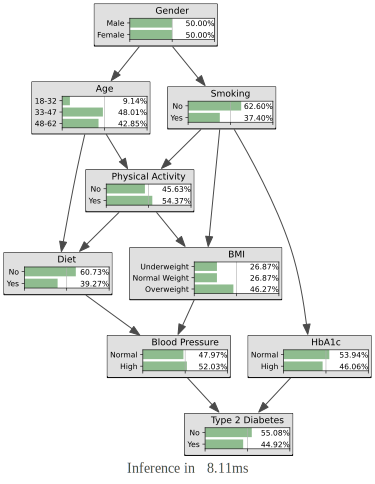

In [5]:
#Show inference
gnb.showInference(bn,evs={})

In [6]:
#Probability of having Type 2 Diabetes if no evidence is available
ie=gum.VariableElimination(bn)
ie.setEvidence({}) 
ie.makeInference() 
ie.posterior("Type 2 Diabetes")[1]

0.44917426556742834

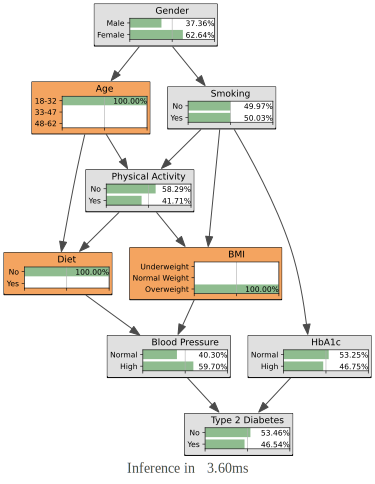

In [7]:
#Show inference with evidence
gnb.showInference(bn,evs={'Age': '18-32','Diet':'No','BMI':'Overweight'})

In [8]:
#Save to BIF format
gum.saveBN(bn,"diabetesBN.bifxml")
with open("diabetesBN.bifxml","r") as out:
    print(out.read())

<?xml version="1.0" ?>

<BIF VERSION="0.3">
<NETWORK>
<NAME>Risk of getting diabetes</NAME>
<PROPERTY>software aGrUM</PROPERTY>

<!-- Variables -->
<VARIABLE TYPE="nature">
	<NAME>Gender</NAME>
	<PROPERTY>Gender</PROPERTY>
	<OUTCOME>Male</OUTCOME>
	<OUTCOME>Female</OUTCOME>
</VARIABLE>

<VARIABLE TYPE="nature">
	<NAME>Age</NAME>
	<PROPERTY>Age</PROPERTY>
	<OUTCOME>18-32</OUTCOME>
	<OUTCOME>33-47</OUTCOME>
	<OUTCOME>48-62</OUTCOME>
</VARIABLE>

<VARIABLE TYPE="nature">
	<NAME>Smoking</NAME>
	<PROPERTY>Smoking</PROPERTY>
	<OUTCOME>No</OUTCOME>
	<OUTCOME>Yes</OUTCOME>
</VARIABLE>

<VARIABLE TYPE="nature">
	<NAME>Physical Activity</NAME>
	<PROPERTY>Physical Activity</PROPERTY>
	<OUTCOME>No</OUTCOME>
	<OUTCOME>Yes</OUTCOME>
</VARIABLE>

<VARIABLE TYPE="nature">
	<NAME>BMI</NAME>
	<PROPERTY>Body Mass Index</PROPERTY>
	<OUTCOME>Underweight</OUTCOME>
	<OUTCOME>Normal Weight</OUTCOME>
	<OUTCOME>Overweight</OUTCOME>
</VARIABLE>

<VARIABLE TYPE="nature">
	<NAME>Diet</NAME>
	<PROPERTY>Diet</PROPER

In [9]:
#Create a DN
## DECISION NETWORK
dn = gum.InfluenceDiagram()

## CHANCE NODES
# Add a chnace node for Type 2 Diabetes
t2d = dn.addChanceNode(gum.LabelizedVariable('Type 2 Diabetes','Type 2 Diabetes',["No","Yes"]))
# Add a chance node for gender
g = dn.addChanceNode(gum.LabelizedVariable('Gender','Gender',["Male","Female"]))
# Add a chance node for age
a = dn.addChanceNode(gum.LabelizedVariable('Age','Age',["18-32","33-47","48-62"]))
# Add a chance node for Smoking
s = dn.addChanceNode(gum.LabelizedVariable('Smoking','Smoking',["No","Yes"]))
# Add a chance node for Physical Activity
pa = dn.addChanceNode(gum.LabelizedVariable('Physical Activity','Physical Activity',["No","Yes"]))
# Add a chance node for BMI
bmi = dn.addChanceNode(gum.LabelizedVariable('BMI','Body Mass Index',["Underweight","Normal Weight","Overweight"]))
# Add a chance node for Diet
d = dn.addChanceNode(gum.LabelizedVariable('Diet','Diet',["No","Yes"]))
# Add a chance node for HbA1c
hba1c = dn.addChanceNode(gum.LabelizedVariable('HbA1c','HbA1c',["Normal","High"]))
# Add a chance node for Blood Pressure
bp = dn.addChanceNode(gum.LabelizedVariable('Blood Pressure','Blood Pressure',["Normal","High"]))

## DECISION NODES
# Add a decision node for Type 2 Diabetes
diagnose = dn.addDecisionNode(gum.LabelizedVariable('Diagnose','Diagnose with Type 2 Diabetes',["No","Yes"]))

## UTILITY NODES
# Add a utility node for Type 2 Diabetes
u = dn.addUtilityNode(gum.LabelizedVariable("U","U",1))
dn.addArc(t2d, u)
dn.addArc(diagnose, u)

print(dn)

Influence Diagram{
  chance: 9,
  utility: 1,
  decision: 1,
  arcs: 2,
  domainSize: 2304
}


In [10]:
#Add arcs to DN
for link in [(g,a),(g,s),(s,bmi),(s,pa),(s,hba1c),(a,pa),(a,d),(bmi,bp),(pa,bmi),(pa,d),(d,bp),(hba1c,t2d),(bp,t2d)]:
    dn.addArc(*link)
print(dn)

#Show visualisation for DN
import pyAgrum.lib.notebook as gnb
dn

Influence Diagram{
  chance: 9,
  utility: 1,
  decision: 1,
  arcs: 15,
  domainSize: 2304
}


(pyAgrum.InfluenceDiagram<double>@0x1252ee200) Influence Diagram{
  chance: 9,
  utility: 1,
  decision: 1,
  arcs: 15,
  domainSize: 2304
}

In [11]:
#Export Influence Diagram as Image
import pyAgrum.lib.image as gumimage

gumimage.export(dn,"DN_Influence_Diagram.png")

In [12]:
#Fill DN with probabilities
#Gender
dn.cpt(g).fillWith([0.5, 0.5])

#Age | Gender
dn.cpt(a)[{'Gender': 'Male'}]=[0.0681, 0.4301, 0.5018]
dn.cpt(a)[{'Gender': 'Female'}]=[0.1147, 0.5301, 0.3552]

print(dn.cpt(a))

#Smoking | Gender
dn.cpt(s)[{'Gender': 'Male'}]=[0.622, 0.378]
dn.cpt(s)[{'Gender': 'Female'}]=[0.630, 0.370]

print(dn.cpt(s))

#Physical Activity | Age, Smoking
dn.cpt(pa)[{'Age': '18-32','Smoking': 'No'}]=[0.3298, 0.6702]
dn.cpt(pa)[{'Age': '18-32','Smoking': 'Yes'}]=[0.905, 0.095]
dn.cpt(pa)[{'Age': '33-47','Smoking': 'No'}]=[0.29, 0.71]
dn.cpt(pa)[{'Age': '33-47','Smoking': 'Yes'}]=[0.711, 0.289]
dn.cpt(pa)[{'Age': '48-62','Smoking': 'No'}]=[0.29, 0.71]
dn.cpt(pa)[{'Age': '48-62','Smoking': 'Yes'}]=[0.711, 0.289]

print(dn.cpt(pa))

#BMI | Physical Activity, Smoking
dn.cpt(bmi)[{'Physical Activity': 'No','Smoking': 'No'}]=[0.3527, 0.3527 , 0.2946]
dn.cpt(bmi)[{'Physical Activity': 'No','Smoking': 'Yes'}]=[0.1844, 0.1844, 0.6312]
dn.cpt(bmi)[{'Physical Activity': 'Yes','Smoking': 'No'}]=[0.3013, 0.3013, 0.3974]
dn.cpt(bmi)[{'Physical Activity': 'Yes','Smoking': 'Yes'}]=[0.2006, 0.2006, 0.5988]

print(dn.cpt(bmi))

#Diet | Age, Physical Activity
dn.cpt(d)[{'Age': '18-32', 'Physical Activity': 'No'}]=[0.626, 0.374]
dn.cpt(d)[{'Age': '18-32', 'Physical Activity': 'Yes'}]=[0.652, 0.348,]
dn.cpt(d)[{'Age': '33-47', 'Physical Activity': 'No'}]=[0.592, 0.408]
dn.cpt(d)[{'Age': '33-47', 'Physical Activity': 'Yes'}]=[0.626, 0.374]
dn.cpt(d)[{'Age': '48-62', 'Physical Activity': 'No'}]=[0.555, 0.445]
dn.cpt(d)[{'Age': '48-62', 'Physical Activity': 'Yes'}]=[0.631, 0.369]

print(dn.cpt(d))

#Blood Pressure | BMI, Diet
dn.cpt(bp)[{'BMI': 'Underweight', 'Diet': 'No'}]=[0.862, 0.138]
dn.cpt(bp)[{'BMI': 'Underweight', 'Diet': 'Yes'}]=[0.653, 0.347]
dn.cpt(bp)[{'BMI': 'Normal Weight', 'Diet': 'No'}]=[0.526, 0.474]
dn.cpt(bp)[{'BMI': 'Normal Weight', 'Diet': 'Yes'}]=[0.333, 0.667]
dn.cpt(bp)[{'BMI': 'Overweight', 'Diet': 'No'}]=[0.403, 0.597]
dn.cpt(bp)[{'BMI': 'Overweight', 'Diet': 'Yes'}]=[0.198, 0.802]

print(dn.cpt(bp))

#HbA1c | Smoking
dn.cpt(hba1c)[{'Smoking': 'No'}]=[0.56, 0.44]
dn.cpt(hba1c)[{'Smoking': 'Yes'}]=[0.505, 0.495]

print(dn.cpt(hba1c))

#Type 2 Diabetes | Blood Pressure, HbA1c
dn.cpt(t2d)[{'Blood Pressure': 'Normal', 'HbA1c': 'Normal'}]=[0.702, 0.298]
dn.cpt(t2d)[{'Blood Pressure': 'Normal', 'HbA1c': 'High'}]=[0.594, 0.406]
dn.cpt(t2d)[{'Blood Pressure': 'High', 'HbA1c': 'Normal'}]=[0.594, 0.406]
dn.cpt(t2d)[{'Blood Pressure': 'High', 'HbA1c': 'High'}]= [0.298, 0.702]

print(dn.cpt(t2d))

#Utility weights
dn.utility("U")[{'Type 2 Diabetes':'No','Diagnose':'No'}]= 100
dn.utility("U")[{'Type 2 Diabetes':'No','Diagnose':'Yes'}]= -100
dn.utility("U")[{'Type 2 Diabetes':'Yes','Diagnose':'No'}]= -100
dn.utility("U")[{'Type 2 Diabetes':'Yes','Diagnose':'Yes'}]= 100



      ||  Age                        |
Gender||18-32    |33-47    |48-62    |
------||---------|---------|---------|
Male  || 0.0681  | 0.4301  | 0.5018  |
Female|| 0.1147  | 0.5301  | 0.3552  |


      ||  Smoking          |
Gender||No       |Yes      |
------||---------|---------|
Male  || 0.6220  | 0.3780  |
Female|| 0.6300  | 0.3700  |


             ||  Physical Activity|
Smokin|Age   ||No       |Yes      |
------|------||---------|---------|
No    |18-32 || 0.3298  | 0.6702  |
Yes   |18-32 || 0.9050  | 0.0950  |
No    |33-47 || 0.2900  | 0.7100  |
Yes   |33-47 || 0.7110  | 0.2890  |
No    |48-62 || 0.2900  | 0.7100  |
Yes   |48-62 || 0.7110  | 0.2890  |


             ||  BMI                        |
Smokin|Physic||Underweig|Normal We|Overweigh|
------|------||---------|---------|---------|
No    |No    || 0.3527  | 0.3527  | 0.2946  |
Yes   |No    || 0.1844  | 0.1844  | 0.6312  |
No    |Yes   || 0.3013  | 0.3013  | 0.3974  |
Yes   |Yes   || 0.2006  | 0.2006  | 0.5988  |


     

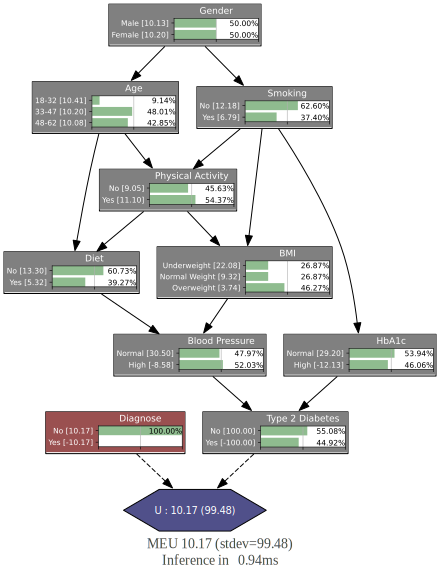

In [13]:
#Show Inference
gnb.showInference(dn,evs={})

In [14]:
#Probability of having Type 2 Diabetes if Blood Pressure is High and HbA1c is Normal
ie=gum.ShaferShenoyLIMIDInference(dn)
ie.setEvidence({'Blood Pressure':'High', 'HbA1c': 'Normal'}) 
ie.makeInference() 
ie.optimalDecision("Diagnose")

(pyAgrum.Potential<double>@0x105d44000) 
  Diagnose         |
No       |Yes      |
---------|---------|
 1.0000  | 0.0000  |

In [15]:
#Utility of diagnosing Yes or No for Type 2 Diabetes
ie.posteriorUtility("Diagnose")

(pyAgrum.Potential<double>@0x114549b18) 
  Diagnose         |
No       |Yes      |
---------|---------|
 18.8000 | -18.8000|

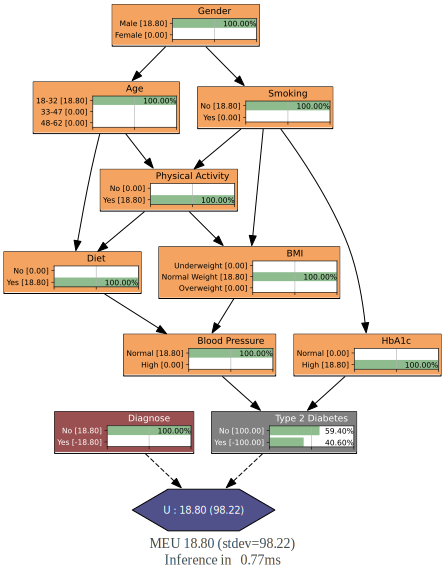

In [16]:
#Show inference with evidence
gnb.showInference(dn,evs={'Gender':'Male', 'Age':'18-32', 'Smoking':'No', 'Physical Activity':'Yes', 'BMI':'Normal Weight', 'Diet':'Yes', 'Blood Pressure':'Normal', 'HbA1c':'High'})